In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('movie_classification.csv', header = 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
# drop n-1 will be faciliated by drop_first that will drop first of the extra vattribute generated
df = pd.get_dummies(df,columns = ['3D_available', 'Genre'], drop_first= True)
# Identify the dummy columns
dummy_columns = df.select_dtypes(include='bool').columns

# Convert boolean values to integers
df[dummy_columns] = df[dummy_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           494 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [5]:
# Pandas 3.0 has this thing that will work as it takes json like object of atribute and replaces the na values
df.fillna({'Time_taken': df['Time_taken'].mean()}, inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [7]:
df.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


# SPlitting the dependeandt and independant variable as x and y

In [8]:
# locating all rows but excluding the main dpeendant variable
x =df.loc[:,  df.columns!="Start_Tech_Oscar"]

In [9]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [10]:
y=df['Start_Tech_Oscar']

# splitting data in training and testing portion

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=4)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 20) (102, 20) (404,) (102,)


# standarrdizing the data

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
sc =sc.fit(x_train)

In [19]:
standardized_x_train = sc.transform(x_train)

In [20]:
standardized_x_test = sc.transform(x_test)

In [22]:
standardized_x_test

array([[-0.41276602, -0.46860723,  0.28155509, ...,  1.44359602,
        -0.50849482, -0.72424326],
       [-0.43259343, -0.8402463 ,  1.29423164, ...,  1.44359602,
        -0.50849482, -0.72424326],
       [-0.42168582, -0.73094069,  1.26019209, ..., -0.69271457,
        -0.50849482,  1.38075154],
       ...,
       [-0.43361856, -0.85919261,  0.35814407, ..., -0.69271457,
        -0.50849482,  1.38075154],
       [ 1.35068723,  1.02232131, -1.55658051, ...,  1.44359602,
        -0.50849482, -0.72424326],
       [-0.43228353,  0.40875248,  0.06029803, ..., -0.69271457,
        -0.50849482, -0.72424326]])

# now trianing our svm m odel 
https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
refer here for learning more about 

In [24]:
from sklearn import svm
from sklearn.svm import SVC

In [29]:
# making a linear classifier
clf_svm_l = svm.SVC(kernel='linear', C=100)
clf_svm_l.fit(standardized_x_train, y_train)

SVC(C=100, kernel='linear')

In [30]:
# predicting values usign trained moel
y_train_pred = clf_svm_l.predict(standardized_x_train)
y_test_pred = clf_svm_l.predict(standardized_x_test)

In [31]:
y_test_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
confusion_matrix(y_test, y_test_pred)

array([[26, 19],
       [22, 35]])

In [36]:
accuracy_score(y_test, y_test_pred)

0.5980392156862745

In [49]:
# number of support vector for first and second class  supportv ectors are datapoints near to the plane
clf_svm_l.n_support_

array([185, 191], dtype=int32)

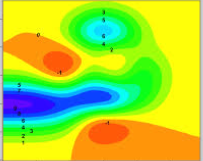

this is a contour where datapoint is surrounded by impact area
(like earthquake seismograph)

# 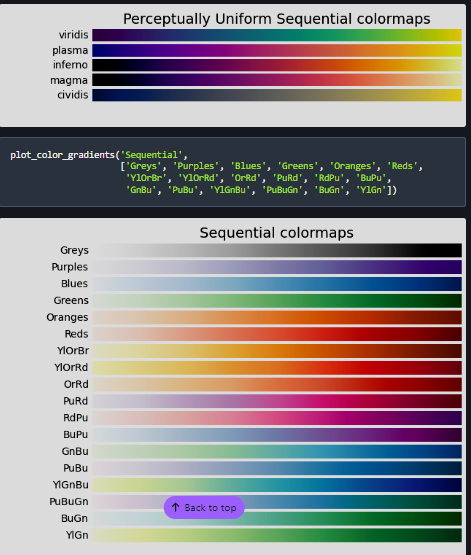

color types for matplotlib

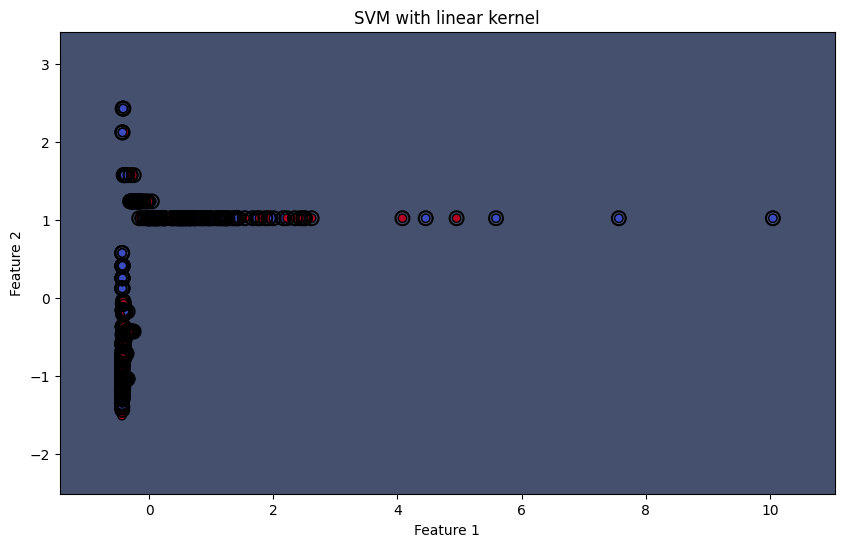

In [57]:

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))

# Create a mesh to plot the decision boundaries
# plot mesh for data with minimum anbd mazimum value where train data can go and 1 unit extra space
# so everything gets inside a graph
x_min, x_max = standardized_x_train[:, 0].min() - 1, standardized_x_train[:, 0].max() + 1
y_min, y_max = standardized_x_train[:, 1].min() - 1, standardized_x_train[:, 1].max() + 1

#  creating plots within rangr of maximum x and y with differnece of 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the decision boundaries for each class
# np.c_ concatenates the x and y while ravel() flattens the dimension of the points to 1 dimenasion
Z = clf_svm_l.predict(np.c_[xx.ravel(), yy.ravel()])
# reshaping the one dimension flattned datapoints to th e dimension of 2D mesh
Z = Z.reshape(xx.shape)
# 
# creating coolwarm themed contour with 80% of opacity
plt.contourf(xx, yy, Z, cmap=plt.cm.cividis, alpha=0.99)

# Plot the training points
plt.scatter(standardized_x_train[:, 0], standardized_x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with linear kernel')

# Plot the support vectors
plt.scatter(clf_svm_l.support_vectors_[:, 0], clf_svm_l.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidths=1.5)

plt.show()


# Optimizing the model using hyperparamter tuning using gridsearch

In [61]:
from sklearn.model_selection import GridSearchCV 

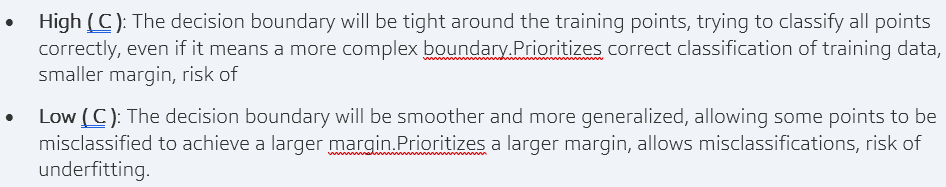

# how C influences model as

In [62]:
#  using different c for parameter tuning 
params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)} 

In [63]:
clf_svm_l = svm.SVC(kernel='linear')

In [64]:
svm_grid_lin = GridSearchCV(clf_svm_l, params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy') 

In [65]:
svm_grid_lin.fit(standardized_x_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [66]:
svm_grid_lin.best_params_ 

{'C': 1}

In [67]:
linsvm_clf = svm_grid_lin.best_estimator_

In [69]:
accuracy_score(y_test, linsvm_clf.predict(standardized_x_test))

0.5980392156862745

In [70]:
# data is less and we have around 500 observations so the optimization has beconme stagnant

# apart from linear we can use radeial polynomian and oter forms of SVM classifier
# Polynomial Clasifier

In [72]:
clf_svm_p3 = svm.SVC(kernel='poly', degree=2, C=0.1)
clf_svm_p3.fit(standardized_x_train, y_train)

SVC(C=0.1, degree=2, kernel='poly')

In [74]:
y_train_pred = clf_svm_p3.predict(standardized_x_train)
y_test_pred = clf_svm_p3.predict(standardized_x_test)

In [76]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

In [77]:
clf_svm_p3.n_support_

array([184, 194], dtype=int32)

# Radial classifier

In [2]:
clf_svm_r = svm.SVC(kernel='rbf', gamma=0.5, C=10)
clf_svm_r.fit(standardized_x_train, y_train)

NameError: name 'svm' is not defined

In [3]:
y_train_pred = clf_svm_r.predict(standardized_x_train)
y_test_pred = clf_svm_r.predict(standardized_x_test)

NameError: name 'clf_svm_r' is not defined

In [83]:
accuracy_score(y_test, y_test_pred)

0.6274509803921569

In [1]:
clf_svm_r.n_support_

NameError: name 'clf_svm_r' is not defined

# Radial grid hyper-parameter tuning 

In [85]:
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)} 

In [86]:
clf_svm_r = svm.SVC(kernel='rbf')

In [87]:
svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,cv=3, verbose=1, scoring='accuracy') 

In [88]:
svm_grid_rad.fit(standardized_x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [89]:
svm_grid_rad.best_params_ 

{'C': 5, 'gamma': 0.01}

In [90]:
radsvm_clf = svm_grid_rad.best_estimator_

In [93]:
accuracy_score(y_test, radsvm_clf.predict(standardized_x_test))

0.6176470588235294

# Radial is considered to be the the best candidate in improving the perfoance of this datast model here